### Keertana V. Chidambaram <br/>PS2 - MACS 30250

In [2]:
import numpy as np
import scipy.optimize as opt
import scipy.interpolate as intpl
import matplotlib.pyplot as plt
%matplotlib notebook

#### Problem 1

In [3]:
# Solution 1.a.
# Constants
beta = 0.9
gamma = 2.2
W_min, W_max, W_size = 0.1, 10.0, 30
W_vec = np.linspace(W_min, W_max, W_size)
epsilon = np.array([-1.40, -0.55, 0.00, 0.55, 1.40])
pi = np.array([0.1, 0.2, 0.4, 0.2, 0.1])

In [4]:
# Initial guess
V_init = np.zeros((len(W_vec), len(epsilon)))
for i in range(len(epsilon)):
    V_init[:, i] = np.log(W_vec) * np.exp(epsilon[i])

In [5]:
# Utility function
def util_CRRA(W_init, W_new, gamma):
    c = W_init - W_new
    util = (c ** (1 - gamma) - 1) / (1 - gamma)
    return util

In [6]:
# Minimization function
def neg_V(W_new, *args):
    W_init, util, V_init_interp, gamma, beta, e = args
    Vtp1 = np.exp(e) * util(W_init, W_new, gamma) + beta * V_init_interp(W_new)
    neg_Vtp1 = -Vtp1    
    return neg_Vtp1

In [7]:
# Iteration constants
VF_maxiter = 200
VF_maxdist = 1e-8
# Parameters that change with each iteration
VF_dist = 10
VF_iter = 0 

In [8]:
# Value function iteration
while (VF_iter < VF_maxiter) and (VF_dist > VF_maxdist):
    VF_iter += 1
    V_new = np.zeros((len(W_vec), len(epsilon)))
    psi_vec = np.zeros((len(W_vec), len(epsilon)))
    
    # Calculating and interpolating the expected value of V w.r.t e'
    V_exp = np.zeros(len(W_vec))
    for i in range(len(pi)):
        V_exp += V_init[:, i] * pi[i]
    V_init_interp = intpl.interp1d(W_vec, V_exp, kind='cubic', fill_value='extrapolate')
    
    for row in range(len(W_vec)):
        for col in range(len(epsilon)):
            W_init = W_vec[row]
            e = epsilon[col]
            V_args = W_init, util_CRRA, V_init_interp, gamma, beta, e
            results_all = opt.minimize_scalar(neg_V, bounds=(1e-10, W_init - 1e-10), 
                                              args=V_args, method='bounded')
            V_new[row, col] = -results_all.fun
            psi_vec[row, col] = results_all.x
    VF_dist = ((V_init - V_new) ** 2).sum()
    V_init = V_new.copy()
    print('VF_iter=', VF_iter, ', VF_dist=', VF_dist)

VF_iter= 1 , VF_dist= 3261.549585618408
VF_iter= 2 , VF_dist= 3208.815427154807
VF_iter= 3 , VF_dist= 4243.148404837784
VF_iter= 4 , VF_dist= 5010.587083521193
VF_iter= 5 , VF_dist= 5505.936900565001
VF_iter= 6 , VF_dist= 5764.875830840365
VF_iter= 7 , VF_dist= 5828.783005996259
VF_iter= 8 , VF_dist= 5741.301266037697
VF_iter= 9 , VF_dist= 5540.971596210649
VF_iter= 10 , VF_dist= 5260.555946107823
VF_iter= 11 , VF_dist= 4927.146080009909
VF_iter= 12 , VF_dist= 4562.611920975376
VF_iter= 13 , VF_dist= 4184.161805645672
VF_iter= 14 , VF_dist= 3804.9116337562955
VF_iter= 15 , VF_dist= 3434.506736737264
VF_iter= 16 , VF_dist= 3079.7990772265284
VF_iter= 17 , VF_dist= 2745.441752645375
VF_iter= 18 , VF_dist= 2434.353003719999
VF_iter= 19 , VF_dist= 2148.079874849752
VF_iter= 20 , VF_dist= 1887.1075274486814
VF_iter= 21 , VF_dist= 1651.124970090904
VF_iter= 22 , VF_dist= 1439.2479088895896
VF_iter= 23 , VF_dist= 1250.2003258275722
VF_iter= 24 , VF_dist= 1082.4584833365457
VF_iter= 25 , VF_di

<IPython.core.display.Javascript object>


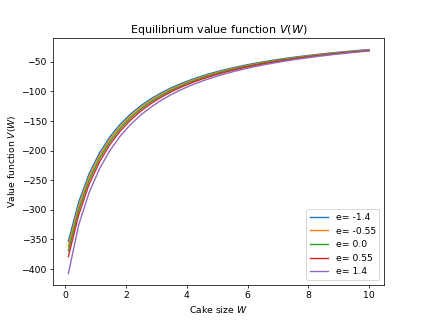

In [9]:
# Solution 1.b.
# Plot the equilibrium value function
for i in range(len(epsilon)):
    plt.plot(W_vec, V_new[:, i], label = "e= " + str(epsilon[i]))
plt.title('Equilibrium value function $V(W)$')
plt.xlabel('Cake size $W$')
plt.ylabel('Value function $V(W)$')
plt.legend()

<IPython.core.display.Javascript object>


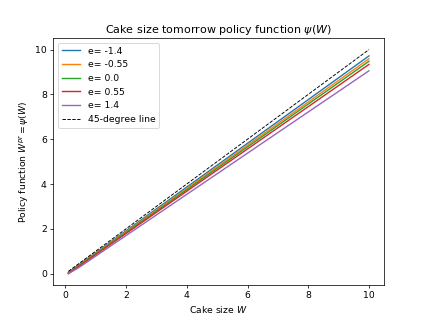

In [10]:
# Solution 1.c.
# Plot the equilibrium value function
for i in range(len(epsilon)):
    plt.plot(W_vec, psi_vec[:, i], label = "e= " + str(epsilon[i]))
plt.plot(W_vec, W_vec, color='black', linewidth=1, linestyle='--',
         label='45-degree line')
plt.title('Cake size tomorrow policy function $\psi(W)$')
plt.xlabel('Cake size $W$')
plt.ylabel('Policy function $W^{pr}=\psi(W)$')
plt.legend()
plt.show()

#### Problem 2

In [11]:
# Solution 2.a
# Copying all constants from previous question
beta = 0.9
gamma = 2.2
W_min, W_max, W_size = 0.1, 10.0, 30
W_vec = np.linspace(W_min, W_max, W_size)
epsilon = np.array([-1.40, -0.55, 0.00, 0.55, 1.40])
pi = np.array([[0.40, 0.28, 0.18, 0.10, 0.04],
               [0.20, 0.40, 0.20, 0.13, 0.07],
               [0.10, 0.20, 0.40, 0.20, 0.10],
               [0.07, 0.13, 0.20, 0.40, 0.20],
               [0.04, 0.10, 0.18, 0.28, 0.40]])

# Initial guess
V_init = np.zeros((len(W_vec), len(epsilon)))
for i in range(len(epsilon)):
    V_init[:, i] = np.log(W_vec) * np.exp(epsilon[i])
    
# Utility function
def util_CRRA(W_init, W_new, gamma):
    c = W_init - W_new
    util = (c ** (1 - gamma) - 1) / (1 - gamma)
    return util

# Minimization function
def neg_V(W_new, *args):
    W_init, util, V_init_interp, gamma, beta, e = args
    Vtp1 = np.exp(e) * util(W_init, W_new, gamma) + beta * V_init_interp(W_new)
    neg_Vtp1 = -Vtp1    
    return neg_Vtp1

# Iteration constants
VF_maxiter = 200
VF_maxdist = 1e-8
# Parameters that change with each iteration
VF_dist = 10
VF_iter = 0 

In [12]:
# Value function iteration
while (VF_iter < VF_maxiter) and (VF_dist > VF_maxdist):
    VF_iter += 1
    V_new = np.zeros((len(W_vec), len(epsilon)))
    psi_vec = np.zeros((len(W_vec), len(epsilon)))
        
    for row in range(len(W_vec)):
        for col in range(len(epsilon)):
            # Calculating and interpolating the expected value of V w.r.t e'
            V_exp = np.zeros(len(W_vec))
            pi_eps = pi[col, :]
            for i in range(len(pi_eps)):
                V_exp += V_init[:, i] * pi_eps[i]
            V_init_interp = intpl.interp1d(W_vec, V_exp, kind='cubic', fill_value='extrapolate')
            
            W_init = W_vec[row]
            e = epsilon[col]
            V_args = W_init, util_CRRA, V_init_interp, gamma, beta, e
            results_all = opt.minimize_scalar(neg_V, bounds=(1e-10, W_init - 1e-10), 
                                              args=V_args, method='bounded')
            V_new[row, col] = -results_all.fun
            psi_vec[row, col] = results_all.x
    VF_dist = ((V_init - V_new) ** 2).sum()
    V_init = V_new.copy()
    print('VF_iter=', VF_iter, ', VF_dist=', VF_dist)

VF_iter= 1 , VF_dist= 3425.581148522783
VF_iter= 2 , VF_dist= 4602.994287524845
VF_iter= 3 , VF_dist= 5418.153952850754
VF_iter= 4 , VF_dist= 6100.151003991723
VF_iter= 5 , VF_dist= 6535.990229941912
VF_iter= 6 , VF_dist= 6732.477374002109
VF_iter= 7 , VF_dist= 6730.570609111395
VF_iter= 8 , VF_dist= 6574.801148701748
VF_iter= 9 , VF_dist= 6305.6201456156095
VF_iter= 10 , VF_dist= 5957.560834928275
VF_iter= 11 , VF_dist= 5559.017510055284
VF_iter= 12 , VF_dist= 5132.6940061299765
VF_iter= 13 , VF_dist= 4696.261756078668
VF_iter= 14 , VF_dist= 4263.098587787443
VF_iter= 15 , VF_dist= 3843.013286319384
VF_iter= 16 , VF_dist= 3442.89887409971
VF_iter= 17 , VF_dist= 3067.311112799207
VF_iter= 18 , VF_dist= 2718.963573301566
VF_iter= 19 , VF_dist= 2399.1444839596506
VF_iter= 20 , VF_dist= 2108.0631282228883
VF_iter= 21 , VF_dist= 1845.1347685790852
VF_iter= 22 , VF_dist= 1609.2108894176617
VF_iter= 23 , VF_dist= 1398.76341891177
VF_iter= 24 , VF_dist= 1212.029945441644
VF_iter= 25 , VF_dist

<IPython.core.display.Javascript object>


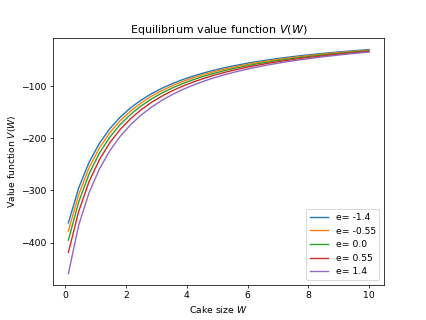

In [13]:
# Solution 2.b.
# Plot the equilibrium value function
for i in range(len(epsilon)):
    plt.plot(W_vec, V_new[:, i], label = "e= " + str(epsilon[i]))
plt.title('Equilibrium value function $V(W)$')
plt.xlabel('Cake size $W$')
plt.ylabel('Value function $V(W)$')
plt.legend()

<IPython.core.display.Javascript object>


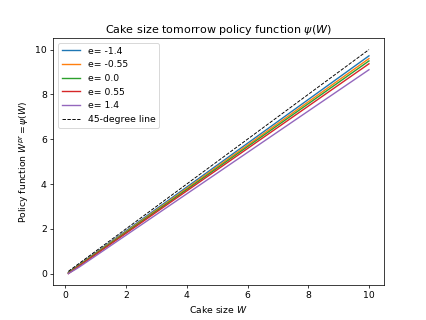

In [14]:
# Solution 1.c.
# Plot the equilibrium value function
for i in range(len(epsilon)):
    plt.plot(W_vec, psi_vec[:, i], label = "e= " + str(epsilon[i]))
plt.plot(W_vec, W_vec, color='black', linewidth=1, linestyle='--',
         label='45-degree line')
plt.title('Cake size tomorrow policy function $\psi(W)$')
plt.xlabel('Cake size $W$')
plt.ylabel('Policy function $W^{pr}=\psi(W)$')
plt.legend()
plt.show()